### 3(a)

To intergrate the integral 
$$\begin{equation}
\int_{0}^{2} e^{-x}sin(x) dx 
\end{equation}$$
First is to integrate by parts using $u=e^{-x}$ and $v'=sin(x)$
$$\begin{equation}
\int_{}^{} udv = uv - \int_{}^{} vdu
\end{equation}$$
$$\begin{equation}
I(x) = -e^{-x}cos(x) - (e^{-x}sin(x) - (-\int_{}^{} e^{-x}sin(x)) dx)
\end{equation}$$
as
$$\begin{equation}
\int_{}^{} e^{-x}sin(x) dx = -e^{-x}cos(x) - (e^{-x}sin(x) - (- \int_{}^{} e^{-x}sin(x)) dx)
\end{equation}$$
we can use sumbsitution to solve this $\int_{}^{} e^{-x}sin(x) dx = u$
$$\begin{equation}
u = -e^{-x}cos(x) - (e^{-x}sin(x) - (- u)
\end{equation}$$
Reaulting in a solution of 
$$\begin{equation}
I(x) = \frac{-e^{-x}cos(x)}{2} - \frac{e^{-x}sin(x)}{2} + C 
\end{equation}$$
 Which results in $ \int_{0}^{2} e^{-x}sin(x) dx = 0.4666296625931756 $

### 3(b)

In this section i have produced a graph of the equation

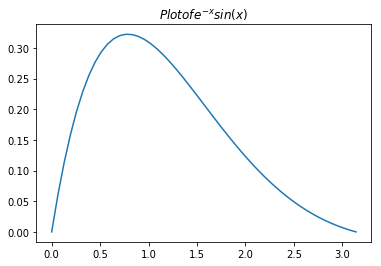

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column

def f(x): return np.exp(-x)*np.sin(x)

x = np.linspace(0,np.pi)

plt.plot(x,f(x))
plt.title("Plot of $e^{-x}sin(x)$")
plt.show()

## 3(c)

This section was to produce a program that estimated the above integral. In this section i have produced two sets of code. One which is based on the equation given on the worksheet found in 3(c).1 and another found in 3(c).2, sourced from revision maths.

   ### 3(c).1
   
To calculate the approximate area i used the following equation from Mathworld (Pacheco, 2019) :
$$\begin{equation}
\int_{a}^{b} f(x) dx \approx \frac{h}{2} (x_{i}+x_{i+1})
\end{equation}$$

In [11]:
def f(x): return np.exp(-x)*np.sin(x)


def Trzm(x0, xn, nmax, f):
    table = []
    intrange = [10**i for i in range(9)]
    for n in intrange:
        area = 0
        h = (xn-x0)/n
        x = np.linspace(x0, xn, n+1, endpoint=True)
        for i in range(len(x)-1):
            a = h/2*(f(x[i])+f(x[i+1]))
            area += a
        
        table.append([n,area])
    
    return(table)
t = Table(rows= Trzm(0, 2, 10, f), names=('intervals', 'Value of integrals'))
    
print(t)

data =  [[1, 0.12306002480577674],
       [10,  0.4627025557980615],
      [100,  0.4665903503621411],
     [1000,  0.4666292694667584],
    [10000,  0.4666296586619121],
   [100000, 0.46662966255386484],
  [1000000,  0.4666296625927708],
 [10000000,  0.4666296625931251],
[100000000, 0.46662966259318084]]


intervals  Value of integrals
--------- -------------------
        1 0.12306002480577674
       10  0.4627025557980615
      100  0.4665903503621411
     1000  0.4666292694667584
    10000  0.4666296586619121
   100000 0.46662966255386484
  1000000  0.4666296625927708
 10000000  0.4666296625931251
100000000 0.46662966259318084


The cell of code above takes approximatly 8.5 minutes to calculate intervals up to $10^8$. To increase the amount of intervals by another power again would take 10x longer.

### 3(c).2

Below is the code for the equation found on revison maths (Revisionmaths.com, 2019) which was found to be much faser than the previous code using the equation : 

$$\begin{equation}
\int_{a}^{b} f(x) dx \approx \frac{h}{2} (y_{0}+y_{n}+2(y_{1}+y_{2}+y_{n-1}))
\end{equation}$$


In [4]:
def f(x): return np.exp(-x)*np.sin(x)


def Trzm_fast(x0, xn, nmax, f):
    table = []
    intrange = [10**i for i in range(9)]
    for n in intrange:
        h = (xn-x0)/n
        x = np.linspace(x0, xn, n+1, endpoint=True)
        s = 0
        sarray = f(x)
        out = sarray[::len(sarray)-1]
        array = sarray[1:-1]
        s0 = np.sum(out)
        s = np.sum(array)
        a = (h/2.0)*(s0+2*s)
        table.append([n,a])
        
    
    return(table)
t = Table(rows= Trzm_fast(0, 2, 10, f), names=('intervals', 'Value of integrals'))
    # 0.5*h*(y1+yn*2*(y2+....+yn-1))
print(t)

fdata=  [[1, 0.12306002480577674],
        [10, 0.46270255579806147],
       [100, 0.46659035036214086],
      [1000,  0.4666292694667587],
     [10000,  0.4666296586619118],
    [100000,  0.4666296625538608],
   [1000000,  0.4666296625927925],
  [10000000,  0.4666296625931384],
 [100000000,   0.466629662592974],
[1000000000,  0.4666296625928447]]

intervals  Value of integrals
--------- -------------------
        1 0.12306002480577674
       10 0.46270255579806147
      100 0.46659035036214086
     1000  0.4666292694667588
    10000  0.4666296586619109
   100000 0.46662966255386307
  1000000  0.4666296625927824
 10000000   0.466629662593172
100000000  0.4666296625931729


This "faster" piece of code takes around 3 seconds to complete. Howerver there are a number of downsides, due to the sliceing and number of varibles used this takes a lot of memory to run compared to the previous set of code. There is one problem in that it breaks down after $10^7$ which you will see in the next section compared to the slower piece of code.

## 3(d)

In this section you will see the plots of $log_{10}$ intervals against $log_{10}$ error. The error was calculated with the analytical value found in 3(a) and the data found in 3(c) : 
$$\begin{equation}
\xi = \mid{\frac{I(x)-A(x)}{I(x)}}\mid
\end{equation}$$

Where  I(x) is the analytical integral value and A(x) being the approximation


### 3(d).1

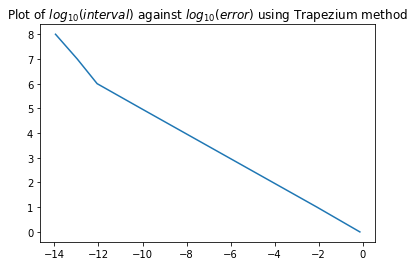

In [14]:
analytical = 0.4666296625931756
xlog_data = []
ylog_data = []
for i in range(len(data)):
    xdata = np.abs((analytical-data[i][1])/analytical)
    ydata = data[i][0]
    xlog_data.append(np.log10(xdata))
    ylog_data.append(np.log10(ydata))

plt.plot(xlog_data,ylog_data)
plt.title("Plot of $log_{10}(interval)$ against $log_{10}(error)$ using Trapezium method")
plt.show()

The analytical error equtaion for trapezium method was found on mathematical python (Math.ubc.ca-Trapizoid, 2019)and is as follows:
$$\begin{equation}
\xi \leqslant {\frac{(b-a)^3}{12N^2}}f^2(x)
\end{equation}$$
Where $f^2$ is the second derivative of f(x)

### 3(d).2

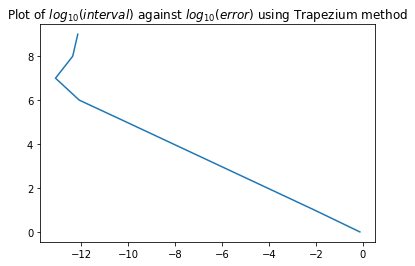

In [15]:
analytical = 0.4666296625931756
fxlog_data = []
fylog_data = []
for i in range(len(fdata)):
    fxdata = np.abs((analytical-fdata[i][1])/analytical)
    fydata = fdata[i][0]
    fxlog_data.append(np.log10(fxdata))
    fylog_data.append(np.log10(fydata))

plt.plot(fxlog_data,fylog_data)
plt.title("Plot of $log_{10}(interval)$ against $log_{10}(error)$ using Trapezium method")
plt.show()

### 3(f)

$$\begin{equation}
\int_{a}^{b} f(x) dx \approx \frac{h}{3} \sum_{i=1}^{N/2}( f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i})
\end{equation}$$

In [26]:
def Simp(x0, xn, sf, f):
    table = []
    intrange = [10**i for i in range(4)]
    for n in intrange:
        area = 0
        h = (xn-x0)/n
        x = np.linspace(x0, xn, n+1, endpoint=True)
        for i in range(int((len(x)-1)/2)):
            a = h/3*(f(x[2*i-2])+4*f(x[2*i-4])+f(x[2*i]))
            area += a
        sfarea = round(area,sf)
        table.append([n,sfarea])
    
    return(table)
t = Table(rows= Simp(0, 2, 16, f), names=('intervals', 'Value of integrals'))
print(t)

sdata = [[ 1,                0.0],
       [10, 0.4026905351753986],
      [100, 0.4637897394555032],
     [1000, 0.4663798110498277],
    [10000, 0.4666050133311767],
   [100000, 0.4666272010201683],
  [1000000, 0.4666294164693797],
 [10000000, 0.4666296379811681],
[100000000, 0.4666296601319549]]


intervals Value of integrals
--------- ------------------
        1                0.0
       10 0.4026905351753986
      100 0.4637897394555032
     1000 0.4663798110498277


### 3(g)

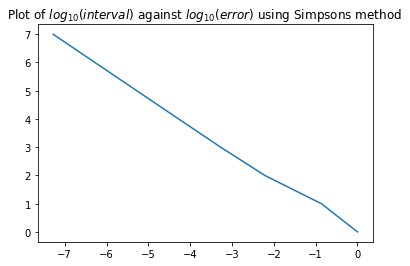

In [27]:
analytical = 0.4666296625931756
xslog_data = []
yslog_data = []
for i in range(len(sdata)-1):
    xsdata = np.abs((analytical-sdata[i][1])/analytical)
    ysdata = data[i][0]
    xslog_data.append(np.log10(xsdata))
    yslog_data.append(np.log10(ysdata))

plt.plot(xslog_data,yslog_data)
plt.title("Plot of $log_{10}(interval)$ against $log_{10}(error)$ using Simpsons method ")
plt.show()

The analytical error equtaion for simpsons method was found on mathematical python (Math.ubc.ca-Simpsons, 2019) and is as follows:
$$\begin{equation}
\xi \leqslant {\frac{(b-a)^5}{180N^4}}f^4(x)
\end{equation}$$
Where $f^4$ is the fourth derivative of f(x)

## References

Pacheco, P. (2019). Chapter 3 - Distributed-Memory Programming with MPI. An Introduction to Parallel Programming. [online] Morgan Kaufmann, pp.83-149. Available at: https://doi.org/10.1016/B978-0-12-374260-5.00003-8. [Accessed 18 Nov. 2019].

Revisionmaths.com. (2019). The Trapezium Rule – Mathematics A-Level Revision. [online] Available at: https://revisionmaths.com/advanced-level-maths-revision/pure-maths/calculus/trapezium-rule [Accessed 18 Nov. 2019].

Math.ubc.ca. (2019). Trapezoid Rule - Mathematical Python. [online] Available at: https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/ [Accessed 18 Nov. 2019].

Math.ubc.ca. (2019). Simpson's Rule - Mathematical Python. [online] Available at: https://www.math.ubc.ca/~pwalls/math-python/integration/simpsons-rule/ [Accessed 18 Nov. 2019].
